# Descripción del proyecto

Estamos trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Nuestra tarea es encontrar patrones en la información disponible. Queremos comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.
Al trabajar con una base de datos, analizaremos los datos de los competidores y probararemos una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

**Descripción de los datos**

Tenemos una base de datos con información sobre viajes en taxi en Chicago:

tabla `neighborhoods`: datos sobre los barrios de la ciudad
* `name`: nombre del barrio
* `neighborhood_id`: código del barrio

tabla `cabs`: datos sobre los taxis
* `cab_id`: código del vehículo
* `vehicle_id`: ID técnico del vehículo
* `company_name`: la empresa propietaria del vehículo

tabla `trips`: datos sobre los viajes
* `trip_id`: código del viaje
* `cab_id`: código del vehículo que opera el viaje
* `start_ts`: fecha y hora del inicio del viaje (tiempo redondeado a la hora)
* `end_ts`: fecha y hora de finalización del viaje (tiempo redondeado a la hora)
* `duration_seconds`: duración del viaje en segundos
* `distance_miles`: distancia del viaje en millas
* `pickup_location_id`: código del barrio de recogida
* `dropoff_location_id`: código del barrio de finalización

tabla `weather_records`: datos sobre el clima
* `record_id`: código del registro meteorológico
* `ts`: fecha y hora del registro (tiempo redondeado a la hora)
* `temperature`: temperatura cuando se tomó el registro
* `description`: breve descripción de las condiciones meteorológicas, por ejemplo, "lluvia ligera" o "nubes dispersas"

**Esquema de la tabla**

Nota: no existe una conexión directa entre las tablas `trips` y `weather_records` en la base de datos. Pero se puede usar JOIN y vincularlas usando la hora en la que comenzó el viaje (`trips.start_ts`) y la hora en la que se tomó el registro meteorológico (`weather_records.ts`).



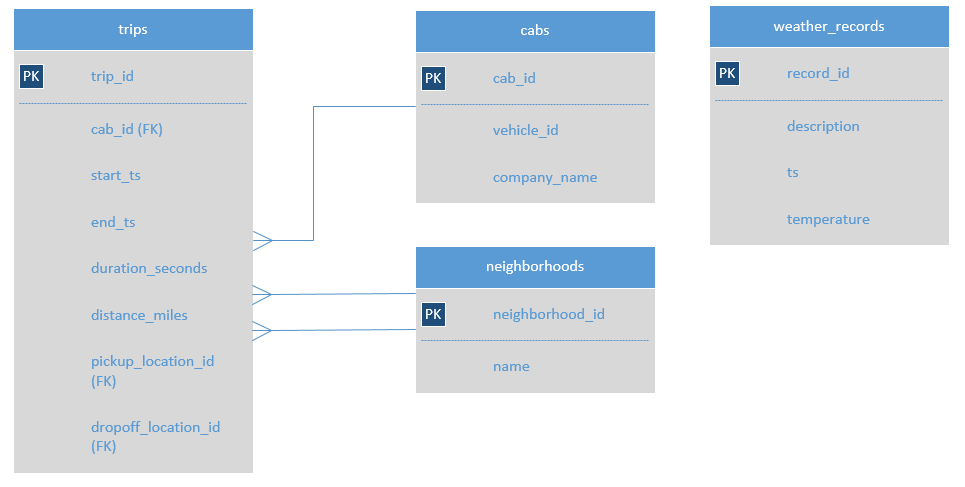

**Agenda**

1.   Recuperar los datos sobre el clima en Chicago en noviembre de 2017 desde el sitio web (https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html). *
2.   Análisis exploratorio de datos I (SQL): *
  * Encontrar el número de viajes en taxi para cada empresa de taxis del 15 al 16 de noviembre de 2017.
  * Encontrar la cantidad de viajes para cada empresa de taxis cuyo nombre contenga las palabras "Yellow" o "Blue" del 1 al 7 de noviembre de 2017.
  * Encontrar la cantidad de viajes en noviembre de 2017 divididos en 3 segmentos de empresas: "Flash Cab", "Taxi Affiliation Services" y "Other".
3. Conclusión del Análisis exploratorio de datos I (SQL)
4. Prueba de hipótesis I (SQL): "La duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos". *
5. Conclusión de la prueba de hipótesis I (SQL)
6. Inicialización y preparación de datos.
7. Análisis exploratorio de datos II (Python)
  * Identificar los 10 principales barrios en términos de finalización del recorrido
  * Graficar: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones.
8. Prueba de hipótesis II (Python): "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".
9. Conclusión.

`*` *Los pasos marcados con un asterisco no están incluidos en este Jupyter Notebook ya que fueron realizados externamente, sin embargo se incluyen las conclusiones de estos puntos.*
  




# Conclusión del Análisis exploratorio de datos I (SQL)

Completamos las tareas detalladas en la [Agenda](https://colab.research.google.com/drive/1rbaOfGpBFhhbP0WLqwNVk7Ip1BqX_ssY?authuser=2#scrollTo=JbqsMn54QbZR&line=12&uniqifier=1) mediante el uso de consultas SQL contra una base de datos externa a este notebook y concluimos:
* Tras analizar la muestra del 15 al 16 de noviembre de 2017 encontramos que las compañías más exitosas en cuanto a cantidad de viajes fueron `Flash Cab` , `Taxi Affiliation Services` y `Medallion Leasin`.
* Al analizar la cantidad de viajes para cada empresa de taxis cuyo nombre contenga las palabras "Yellow" o "Blue" a lo largo de una semana, podemos ver hay una tendencia clara a una mayor cantidad de viajes para las empresas que llevan "Yellow" en su nombre. Al parecer es beneficioso por su asociación directa del color amarillo con los taxis, color usado generalmente por los taxis.
* Si tomamos los datos de viajes para la primera semana de noviembre, y dividimos las empresas entre los segmentos "Flash Cab", "Taxi Affiliation Services" y "Other", resulta en que "Flash Cab" posee el `~14,6%` del total de viajes, mientras que "Taxi Affiliation Services" un `~8,6%`, lo que equivaldría a que estas dos empresas generan un `23,2%` del total de viajes dentro de una semana a pesar de que hay un total de 64 compañías en total.

# Conclusión de la prueba de hipótesis I (SQL)
Completamos las tareas detalladas en la [Agenda](https://colab.research.google.com/drive/1rbaOfGpBFhhbP0WLqwNVk7Ip1BqX_ssY?authuser=2#scrollTo=JbqsMn54QbZR&line=12&uniqifier=1) mediante el uso de consultas SQL contra una base de datos externa a este notebook y concluimos:

* Al realizar la prueba de la hipótesis "La duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos" basandonos en las observaciones de noviembre 2017, se confirma que se trata de una afirmación verdadera. La duración media del viaje los sábados con mal tiempo (lluvia o tormenta) es de 2427,21 segundos, mientras que la duración media del viaje los días de buen tiempo es de 1999,68 segundos. Por lo tanto, el mismo viaje de sábado desde el Loop a O'Hare es  aproximadamente 7 minutos más largo (427,53 segundos) cuando hay mal tiempo en comparación con los días de buen tiempo.

En este momento del analisis tenemos algunas referencias de las tendencias de viaje en Taxi, pero no recomendaríamos tomar acciones respecto a estos resultados, ya que no hemos confirmado aún si es una diferencia estadisticamente significativa.


# Inicialización
Además de los datos recuperados en tareas anteriores, ahora nos proveen con 2 archivos extras:
/datasets/project_sql_result_01.csv contiene los siguientes datos:
* `company_name`: nombre de la empresa de taxis
* `trips_amount`: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

/datasets/project_sql_result_04.csv. contiene los siguientes datos:
* `dropoff_location_name`: barrios de Chicago donde finalizaron los viajes
* `average_trips`: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

/datasets/project_sql_result_07.csv — el resultado de la última consulta SQL. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. 
* `start_ts`: fecha y hora de la recogida
* `weather_conditions`: condiciones climáticas en el momento en el que comenzó el viaje
* `duration_seconds`: duración del viaje en segundos

Procederemos a importar los archivos y estudiarlos para un analizarlos posteriormente.

## Importar los archivos y estudiar la información general












In [1]:
# Importamos librerías
import pandas as pd
import numpy as mp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import levene

In [2]:
#Cargamos los archivos de datos
try:
  companies = pd.read_csv('/datasets/project_sql_result_01.csv')
except:
  companies = pd.read_csv('/content/project_sql_result_01.csv')

try:
  dropoffs = pd.read_csv('/datasets/project_sql_result_04.csv')
except:
  dropoffs = pd.read_csv('/content/project_sql_result_04.csv')

try:  
  loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')
except:
  loop_ohare = pd.read_csv('/content/project_sql_result_07.csv')

### Estudiando datos de archivo de empresas

In [3]:
# previsualizar los datos cargados
companies.info()

# devolver las n filas superiores del dataframe
companies.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


`company_name` debería ser de tipo string.

In [4]:
#Visualizar estadisticas descriptivas
companies.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


El 75% de las compañías tiene menos de 2106 viajes.

In [5]:
#confirmando si existen valores ausentes
companies.isna().sum()

company_name    0
trips_amount    0
dtype: int64

No hay valores ausentes en los datos

In [6]:
#validando si hay una fila por empresa 
companies['company_name'].nunique() == len(companies)

True

Hay una fila por empresa, por lo que hay 64 empresas en total.

Text(0, 0.5, 'Cantidad de empresas')

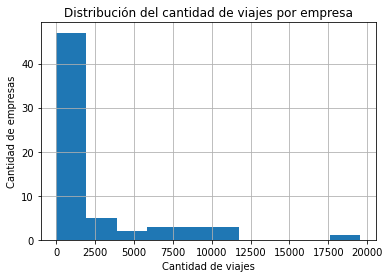

In [7]:
#Graficando distribución de datos
companies['trips_amount'].hist().set_title('Distribución del cantidad de viajes por empresa')
plt.xlabel("Cantidad de viajes")
plt.ylabel("Cantidad de empresas")

La gran mayoría de las compañías tienen menos de 2.500 viajes, hay algunos valores atípicos que alcanzan hasta los 19.000 viajes.

In [8]:
#Validando nombres de empresas
companies['company_name'].unique()

array(['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasin',
       'Yellow Cab', 'Taxi Affiliation Service Yellow',
       'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi',
       'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.',
       'Choice Taxi Association', 'Globe Taxi',
       'Dispatch Taxi Affiliation', 'Nova Taxi Affiliation Llc',
       'Patriot Taxi Dba Peace Taxi Associat', 'Checker Taxi Affiliation',
       'Blue Diamond', 'Chicago Medallion Management', '24 Seven Taxi',
       'Chicago Medallion Leasing INC', 'Checker Taxi', 'American United',
       'Chicago Independents', 'KOAM Taxi Association', 'Chicago Taxicab',
       'Top Cab Affiliation', 'Gold Coast Taxi',
       'Service Taxi Association', '5 Star Taxi', '303 Taxi',
       'Setare Inc', 'American United Taxi Affiliation', 'Leonard Cab Co',
       'Metro Jet Taxi A', 'Norshore Cab', '6742 - 83735 Tasha ride inc',
       '3591 - 63480 Chuks Cab', '1469 - 64126 Omar Jada',
       '6

Podemos ver que algunos nombres de empresas tienen una serie de números al inicio, esto probablemente fue algún tipo de error al extraer los datos.

## Estudiando datos de archivo de finalización de viajes

In [9]:
# previsualizar los datos cargados
dropoffs.info()

# devolver las n filas superiores del dataframe
dropoffs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


`dropoff_location_name` debería ser string.

In [10]:
#Visualizar estadisticas descriptivas
dropoffs.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


El 75% de los barrios tiene menos de 298 viajes.

In [11]:
#validando si existen valores ausentes
dropoffs.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

No hay valores ausentes.

In [12]:
#validando si hay una fila por barrio en los cuales finalizaron viajes
dropoffs['dropoff_location_name'].nunique() == len(dropoffs)

True

Cada fila es un barrio diferente.

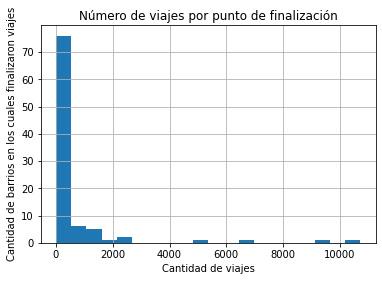

In [13]:
#Graficando distribución de datos
dropoffs['average_trips'].hist(bins=20).set_title('Número de viajes por punto de finalización'),
plt.xlabel("Cantidad de viajes")
plt.ylabel("Cantidad de barrios en los cuales finalizaron viajes");

En la mayoría de barrios finalizan entre 0 y 500 viajes, podemos visualizar también que hay algunos valores atípicos de barrios que reciben más de 10.000 viajes.

##Estudiando datos de archivo de viajes desde el Loop hasta el Aeropuerto Internacional O'Hare

In [14]:
# previsualizar los datos cargados
loop_ohare.info()

# devolver las n filas superiores del dataframe
loop_ohare.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


`start_ts` debería ser de tipo datetime. No es necesario que `duration_seconds` tenga decimales ya que no cuenta fracciones de segundo, por lo que sería más claro si fuera integer.

In [15]:
#Visualizar estadisticas descriptivas
loop_ohare.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [16]:
#validando si existen valores ausentes
loop_ohare.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

No hay valores ausentes.

In [17]:
#validando si hay una fila por marca de tiempo
loop_ohare['start_ts'].nunique() == len(loop_ohare)

False

In [18]:
#validando que tan común es que se repitan marcas de tiempo
loop_ohare['start_ts'].value_counts().sort_values(ascending=False).head()

2017-11-11 10:00:00    48
2017-11-04 14:00:00    46
2017-11-04 12:00:00    46
2017-11-11 06:00:00    45
2017-11-11 08:00:00    43
Name: start_ts, dtype: int64

Al parecer hay varias filas por marca de tiempo, esto es probablemente porque es una fila por viaje realizado y que además la marca de tiempo fue aproximada a la hora según los registros entregados. No tenemos identificador unico de viaje además del index.

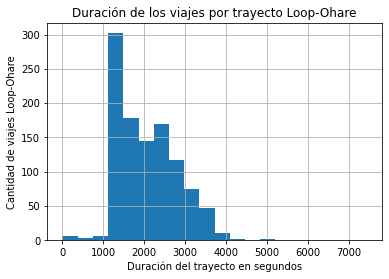

In [19]:
#Graficando distribución de datos
loop_ohare['duration_seconds'].hist(bins=20).set_title('Duración de los viajes por trayecto Loop-Ohare')
plt.xlabel("Duración del trayecto en segundos")
plt.ylabel("Cantidad de viajes Loop-Ohare");

La mayoría de los viajes parece estar concentrado entre los 1.000 y 3.000 segundos de duración, hay algunos valores atipicos de viajes bastante cortos y otros bastante largos.

## Conclusión

Hemos comprobado la información general de 3 conjuntos de datos (companies, dropoffs y loop_ohare).

Al comprobar los datos, comprobamos que los conjuntos de datos están bastante limpios, no encontramos grandes problemas o discrepancias, sin embargo hay problemas menores como:

* Es necesario cambiar el tipo de datos de la columna "company_name" en la tabla `company`, además algunos nombres parecen haber sido extraidos incorrectamente ya que contienen una código númerico al inicio del nombre.
* Es necesario cambiar el tipo de datos de la columna "dropoff_location_name" en la tabla `dropoff`.
* Es necesario cambiar el tipo de datos de la columna "start_ts" y "duration_seconds" en la tabla `loop_ohare`.

# Preparar los datos

Tenemos identificados que correcciones debemos hacer en los datos, procederemos a aplicarlos.

In [20]:
#Corrigiendo errores en "companies"

##cambiando tipo de datos
companies['company_name'] = companies['company_name'].astype(str)
##quitando serie de números y guines de los nombres
companies['company_name'] = companies['company_name'].str.replace('\d+ - (\d+)* -*', '')
companies['company_name'] = companies['company_name'].str.replace('\d+ - ', '')

<ipython-input-20-bfab1e7f8726>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  companies['company_name'] = companies['company_name'].str.replace('\d+ - (\d+)* -*', '')
<ipython-input-20-bfab1e7f8726>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  companies['company_name'] = companies['company_name'].str.replace('\d+ - ', '')


In [21]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [22]:
#Corrigiendo errores en "dropoff"

##cambiando tipo de datos
dropoffs['dropoff_location_name'] =  dropoffs['dropoff_location_name'].astype(str)

In [23]:
dropoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [24]:
#Corrigiendo errores en "loop_ohare"

##cambiando tipo de datos
loop_ohare['start_ts'] = pd.to_datetime(loop_ohare['start_ts'])
loop_ohare['duration_seconds'] = loop_ohare['duration_seconds'].astype(int)

In [25]:
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


# Análisis exploratorio de datos II (Python)

## Empresas de taxis y número de viajes

Ahora que nuestros datos están preparados podemos proceder a realizar nuestro analisis, comenzaremos contrastando las empresas de taxis por número de viajes.

                       company_name  trips_amount
0                         Flash Cab         19558
1         Taxi Affiliation Services         11422
2                  Medallion Leasin         10367
3                        Yellow Cab          9888
4   Taxi Affiliation Service Yellow          9299
..                              ...           ...
59                  Adwar H. Nikola             7
60                       Benny Jona             7
61                 Sergey Cab Corp.             5
62       Felman Corp, Manuel Alonso             3
63                   RC Andrews Cab             2

[64 rows x 2 columns]


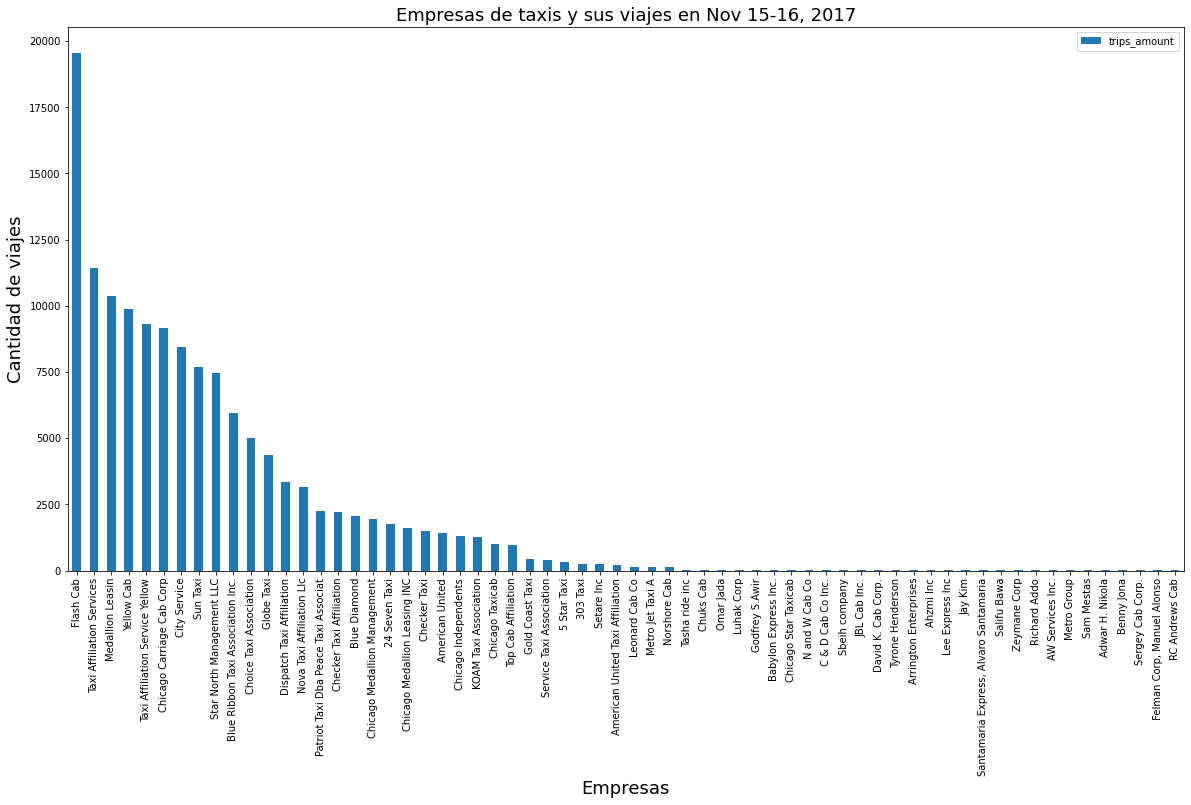

In [26]:
#Tabulando y graficando compañias por número de viajes
sorted_companies=companies.sort_values(by=['trips_amount'], ascending=False)
print(sorted_companies)

ax = sorted_companies.plot(kind='bar', x='company_name', y='trips_amount',figsize=(20,10))

ax.set_title("Empresas de taxis y sus viajes en Nov 15-16, 2017", fontsize=18)
ax.set_ylabel("Cantidad de viajes", fontsize=18);
ax.set_xlabel("Empresas", fontsize=18);

Podemos ver que Flash Cab es por mucha diferencia la empresa más popular, casi duplicando a Taxi Affiliation Services en el segundo lugar.

In [27]:
#Calculando porcentaje de viajes sobre el total para el top 10 de empresas
total_trips = companies['trips_amount'].sum()
companies['% of total trips'] = companies['trips_amount'] / total_trips
companies.sort_values(by=['% of total trips'], ascending=False).head(10)

,company_name,trips_amount,% of total trips
0,Flash Cab,19558,0.142436
1,Taxi Affiliation Services,11422,0.083183
2,Medallion Leasin,10367,0.075500
3,Yellow Cab,9888,0.072012
4,Taxi Affiliation Service Yellow,9299,0.067722
5,Chicago Carriage Cab Corp,9181,0.066863
6,City Service,8448,0.061525
7,Sun Taxi,7701,0.056084
8,Star North Management LLC,7455,0.054293
9,Blue Ribbon Taxi Association Inc.,5953,0.043354


**Conclusión**

Flash Cab es la empresa más popular actualmente, recibe casi el 15% de todos los viajes de Chicago para la muestra de dos días en noviembre 2017. Sería interesante para Zuber investigar que factor o modelo de negocio pudo haber llevado a Flash Cab a ese nivel de exito para recrear o quizas pensar en tener algún tipo de alianza con Flash Cab.

## Top 10 barrios principales por número de finalizaciones

Continuemos con el segundo requerimiento, nos solicitaron identificar los 10 principales barrios en términos de finalización del recorrido y sacar conclusiones de ello.

In [28]:
#top 10 principales barrios en términos de finalización del recorrido
dropoffs.sort_values(by=['average_trips'], ascending=False).round(decimals=2).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


Los 10 barrios en los cuales más finalizan viajes son:  Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campud, Gold Coast y Sheffield & De Paul. Grafiquemos para ver claramente las diferencias entre estas 10 empresas.

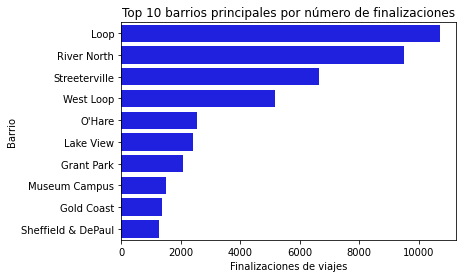

In [29]:
#Graficando top 10 principales barrios en términos de finalización del recorrido
data = dropoffs.sort_values(by=['average_trips'], ascending=False).round(decimals=2).head(10)
sns.barplot(x="average_trips", y="dropoff_location_name", data=data, color="Blue").set_title('Top 10 barrios principales por número de finalizaciones')
plt.xlabel("Finalizaciones de viajes")
plt.ylabel("Barrio");

De esta forma es mucho más claro ver que los primeros 4 barrios tienen muchas más finalizaciones de viajes que el resto.

In [30]:
#Calculando porcentaje de viajes sobre el totoal para cada barrio
total_trips = dropoffs['average_trips'].sum()
dropoffs['% of total trips'] = dropoffs['average_trips'] / total_trips
dropoffs.sort_values(by=['% of total trips'], ascending=False).head(10)

,dropoff_location_name,average_trips,% of total trips
0,Loop,10727.466667,0.190218
1,River North,9523.666667,0.168872
2,Streeterville,6664.666667,0.118177
3,West Loop,5163.666667,0.091561
4,O'Hare,2546.900000,0.045161
5,Lake View,2420.966667,0.042928
6,Grant Park,2068.533333,0.036679
7,Museum Campus,1510.000000,0.026775
8,Gold Coast,1364.233333,0.024190
9,Sheffield & DePaul,1259.766667,0.022338


In [31]:
#Suma de los primeros 4 barrios con más viajes
dropoffs.iloc[0:4]['% of total trips'].sum()

0.5688287378682103

**Conclusión**

Los barrios Loop, River North, Streeterville y West Loop en conjunto equivalen al 56% del total de finalizaciones de viajes en nuestros datos. Haciendo una pequeña investigación estos 4 barrios se encuentran en el centro de Chicago y todos son adjacentes, Loop siendo la más popular con los otros 3 barrios al rededor. 

Podemos concluir que el área más popular para la finalización de viajes es el **centro de Chicago, en o a los alrededores de Loop**.

# Prueba de hipótesis II (Python)

Nuestro siguiente paso es probar la hipótesis "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos" tal cuál lo hicimos en el paso de "Prueba de hipótesis I (SQL)", usaremos los resultados del query pero ahora confirmando si existe realmente una diferencia estadisticamente significativa. 

Antes de comenzar a realizar nuestro procedimiento para la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos, validaremos si la varianza la duración promedio de los viajes varía, de esta forma podremos aplicar con mayor certeza nuestro t-test. Usaremos una prueba levene con los siguientes parametros:

$$H_0: \text{La varianza de la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no varia los días lluviosos.}$$
$$H_1: \text{La varianza de la duración de de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare varia los días lluviosos}$$
$$alpha: \text{5%}$$

La prueba de Levene toma 3 atributos para "center". Para tener más confianza en el resultado, probaremos los 3 atributos.

In [32]:
#Separamos nuestros datos de buenas condiciones climaticas vs días lluviosos
good_days = loop_ohare.loc[loop_ohare['weather_conditions']=='Good']['duration_seconds']
bad_days = loop_ohare.loc[loop_ohare['weather_conditions']=='Bad']['duration_seconds']

In [33]:
alpha = 0.05 # significación estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

stat, p = levene(good_days, bad_days) # por defecto es center="median" 

print('p-value:', p)

if (p < alpha):
        print('Rechazamos la hipótesis nula')
else:
    print('No rechazamos la hipótesis nula')

p-value: 0.5332038671974493
No rechazamos la hipótesis nula


No se rechaza la hipótesis nula , por lo que la varianza de la duración de los viajes para ambos climas no difiere. Procedamos a usar esta información en nuestro t-test:

$$H_0: \text{La duración promedio de los viajes Loop-O'Hare no cambia los sábados lluviosos.}$$
$$H_1: \text{La duración promedio de los viajes Loop-O'Hare cambia los sábados lluviosos}$$
$$alpha: \text{5%}$$
$$equal var = \text{True}$$

Empezamos con la hipótesis nula H₀ que es que hay igualdad de duración promedio de los viajes para clima bueno como en clima malo. La hipótesis alternativa, H₁ es que la duración promedio de ambos climas difiere. Para ello, utilizaremos un alfa de 0,05, lo que significa que sólo en el 5% de los casos rechazaremos la hipótesis nula cuando sea cierta. Sabemos además que la varianza de ambas muestras es igual por lo que el parametro equal_var será igual a True.


In [36]:
#calcular la duración media de los trayectos con y sin lluvia
avg_nonrainy_rides = good_days.mean()
print('La duración media de los sábados no lluviosos es de ' + str(avg_nonrainy_rides/60))

avg_rainy_rides = bad_days.mean()
print('La duración media de los sábados lluviosos es de ' + str(avg_rainy_rides/60))


alpha = 0.05 # significación estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

results = st.ttest_ind(good_days, bad_days, equal_var=True)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

La duración media de los sábados no lluviosos es de 33.327927927927924
La duración media de los sábados lluviosos es de 40.45342592592593
p-value: 6.517970327099473e-12
Rechazamos la hipótesis nula


**Conclusión** 

Tras someter nuestra muestra de datos a la prueba con un nivel de significación estadística de 0,05 (lo que significa que sólo en el 5% de los casos rechazaremos la hipótesis nula cuando sea cierta), se ha rechazado nuestra hipótesis sobre la igualdad de los promedios de las muestras pareadas, este resultado implica que **la duración media de los trayectos entre el Loop y el aeropuerto internacional O'Hare cambia los sábados lluviosos**. La duración media de los trayectos en sábado lluvioso es de ~40,45 minutos, mientras que la duración media de los trayectos en sábado no lluvioso es de ~33,33 minutos. Hay 7 minutos de diferencia entre las dos muestras. Por lo tanto, podemos concluir que el tiempo influye en la frecuencia de los trayectos.

# Conclusión general

Zuber, una nueva empresa de viajes compartidos, tiene previsto debutar en Chicago, Illinois (EE.UU.). Encontrar patrones relativos a las preferencias de los pasajeros y los efectos de influencias externas en los viajes es la tarea que nos han encomendado como analista de Zuber para responder a la pregunta "¿Qué afecta a un viaje?". Tras examinar una muestra de datos de viajes en taxi de noviembre de 2017 e informes meteorológicos, se obtuvieron las siguientes conclusiones:

* Según la regulación en Chicago los taxis pueden ser de cualquier color, pero hay señales que indican que los taxis utilizan el color estratégicamente para ser mejor identificados, cosa que se hizo evidente cuando notamos que algunas empresas lo usaban hasta en sus nombres y tenían mucho más exito que otros colores como el Azul. De ser posible, recomendaríamos que los taxis de Zuber usen el color amarillo para destacar.

* La empresa de taxis con más éxito de Chicago es "Flash Cab", que realiza casi el doble de viajes que la siguiente empresa "Taxi Affiliation Services". Zuber podría plantearse estudiar más detenidamente qué hace esta empresa para lograr semejante éxito, quizá afiliandose con "Flash Cab" o contratando a un consultor con experiencia en el sector local del taxi que pudiese ayudarle a seguir una estretegia similar. 

* La mayoría de los viajes concluyen en Loop o en los alrededores del centro de Chicago, a pesar de que Chicago cuenta con más de 90 barrios únicos. Zuber podría pensar en competir directamente con las empresas en esa región, o quizá una posibilidad aún mayor sería tratar de convencer a los clientes de fuera de la región para que utilicen Zuber, ya que podrían no estar bien atendidos por el sistema actual.

* La duración de un viaje se ve influida significativamente por el clima, ya que los días de mal tiempo dan lugar a un viaje en promedio 7 minutos más largo. Los viajes más largos hacen que los taxis estén ocupados por más tiempo, lo que reduce la disponibilidad. Zuber debe tener en cuenta el tiempo a la hora de fijar los precios. Quizas debería haber una tarifa diferencial por "mal tiempo" o que una variable para calcular el precio final también sea la duración del viaje.